## Problem Statement:
To analyze the heart disease dataset to explore the machine learning algorithms and build Decision Tree model to predict the disease.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df1 = pd.read_csv('HeartDisease.csv')
df1.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df = df1.copy()

In [4]:
df.shape

(303, 14)

### Data Preprocessing

#### Handling Null Values

In [5]:
df.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

#### Handling Duplicates

In [6]:
df.duplicated().sum()

1

In [7]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [8]:
df.dtypes

age                      int64
gender                   int64
chest_pain               int64
rest_bps                 int64
cholestrol               int64
fasting_blood_sugar      int64
rest_ecg                 int64
thalach                  int64
exer_angina              int64
old_peak               float64
slope                    int64
ca                       int64
thalassemia              int64
target                   int64
dtype: object

#### Check the target variable

In [9]:
df['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

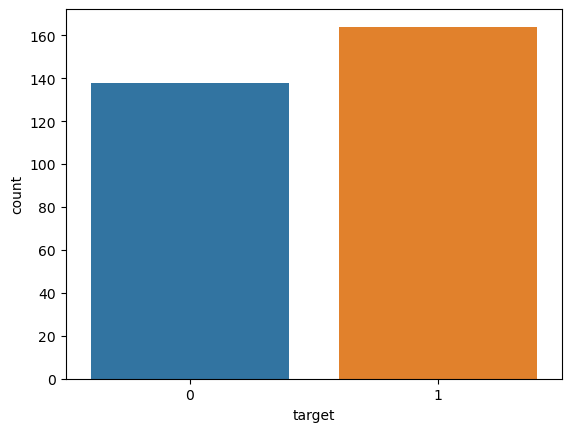

In [10]:
sns.countplot(x=df['target'])
plt.show()

### EDA

#### Univariate Analysis

In [11]:
df.columns
df.head(3)

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [12]:
for i in df.columns[[1,2,5,6,8,10,11,12]]:
    print(f'Feature: {i}')
    print(df[i].value_counts())
    print('*'*25)

Feature: gender
1    206
0     96
Name: gender, dtype: int64
*************************
Feature: chest_pain
0    143
2     86
1     50
3     23
Name: chest_pain, dtype: int64
*************************
Feature: fasting_blood_sugar
0    257
1     45
Name: fasting_blood_sugar, dtype: int64
*************************
Feature: rest_ecg
1    151
0    147
2      4
Name: rest_ecg, dtype: int64
*************************
Feature: exer_angina
0    203
1     99
Name: exer_angina, dtype: int64
*************************
Feature: slope
2    141
1    140
0     21
Name: slope, dtype: int64
*************************
Feature: ca
0    175
1     65
2     38
3     20
4      4
Name: ca, dtype: int64
*************************
Feature: thalassemia
2    165
3    117
1     18
0      2
Name: thalassemia, dtype: int64
*************************


#### Bivariate Analysis

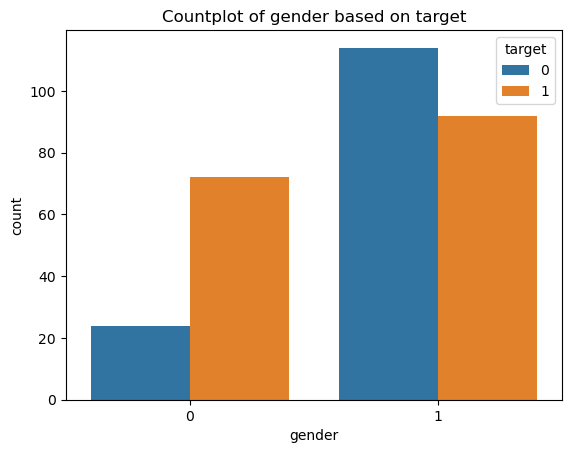

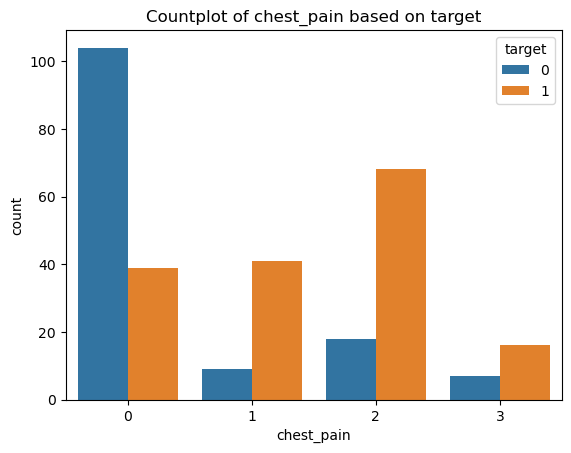

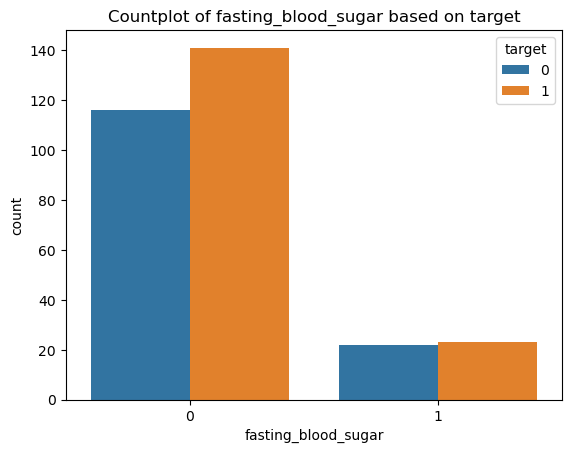

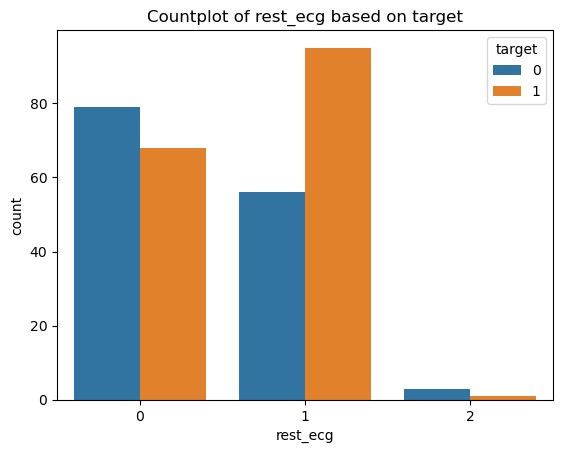

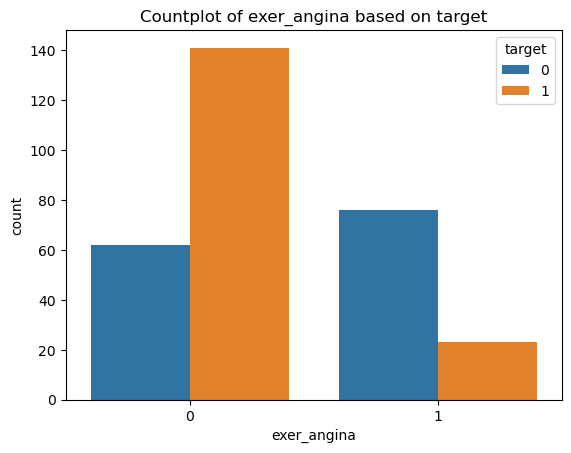

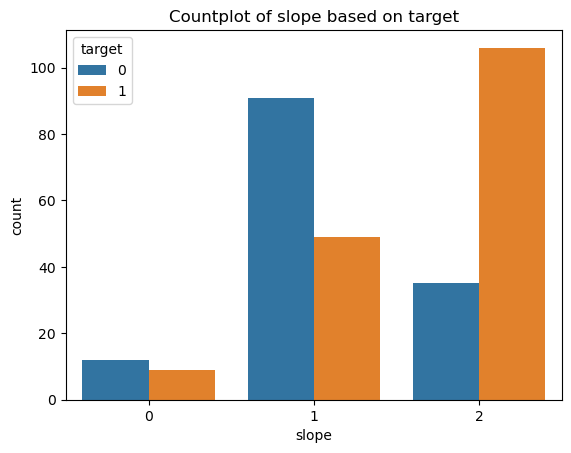

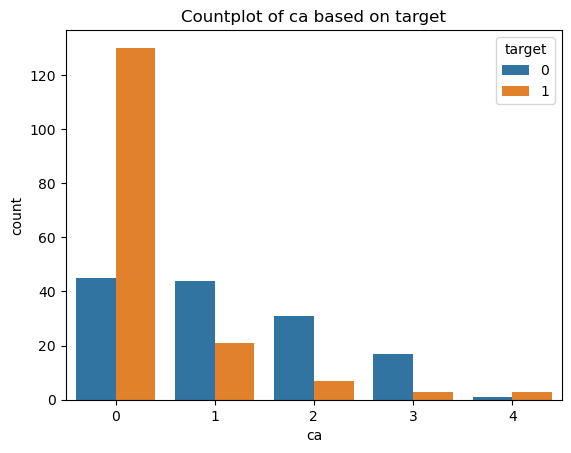

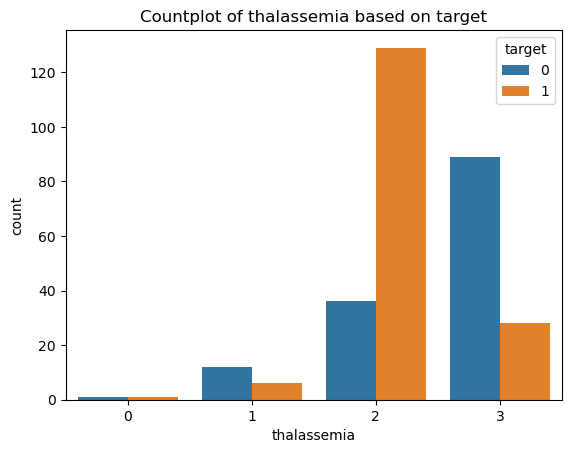

In [13]:
for i in df.columns[[1,2,5,6,8,10,11,12]]:
    sns.countplot(x=df[i], hue=df['target'])
    plt.title(f'Countplot of {i} based on target')
    plt.show()

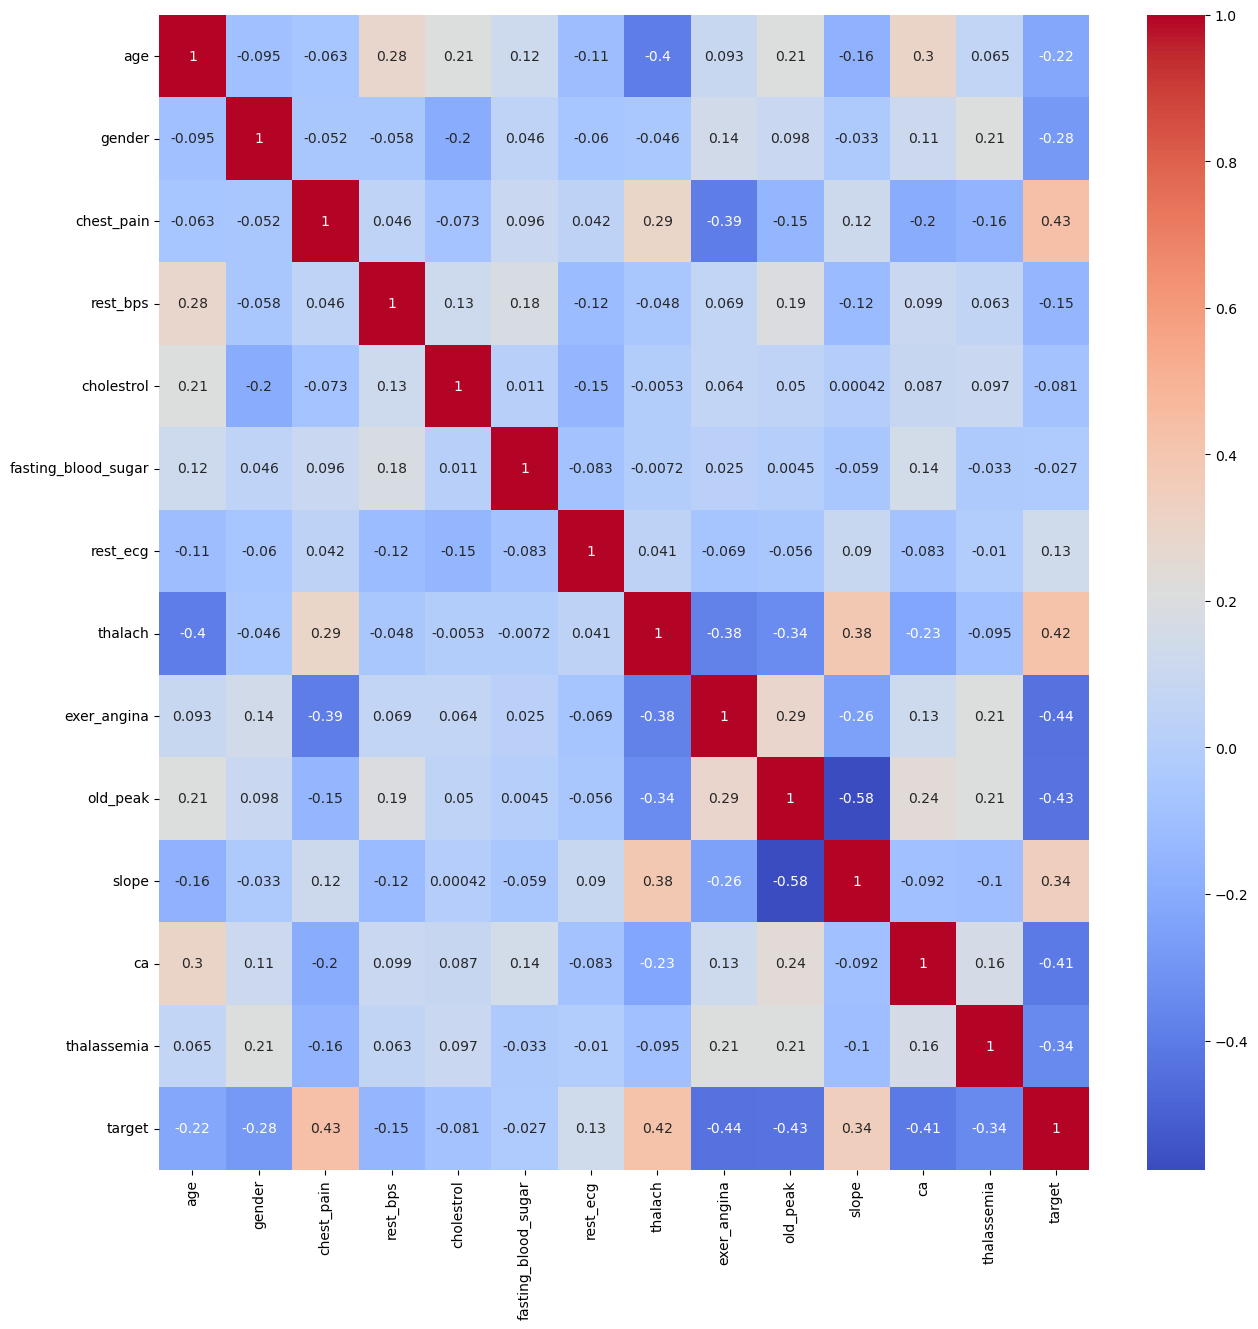

In [14]:
corr = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

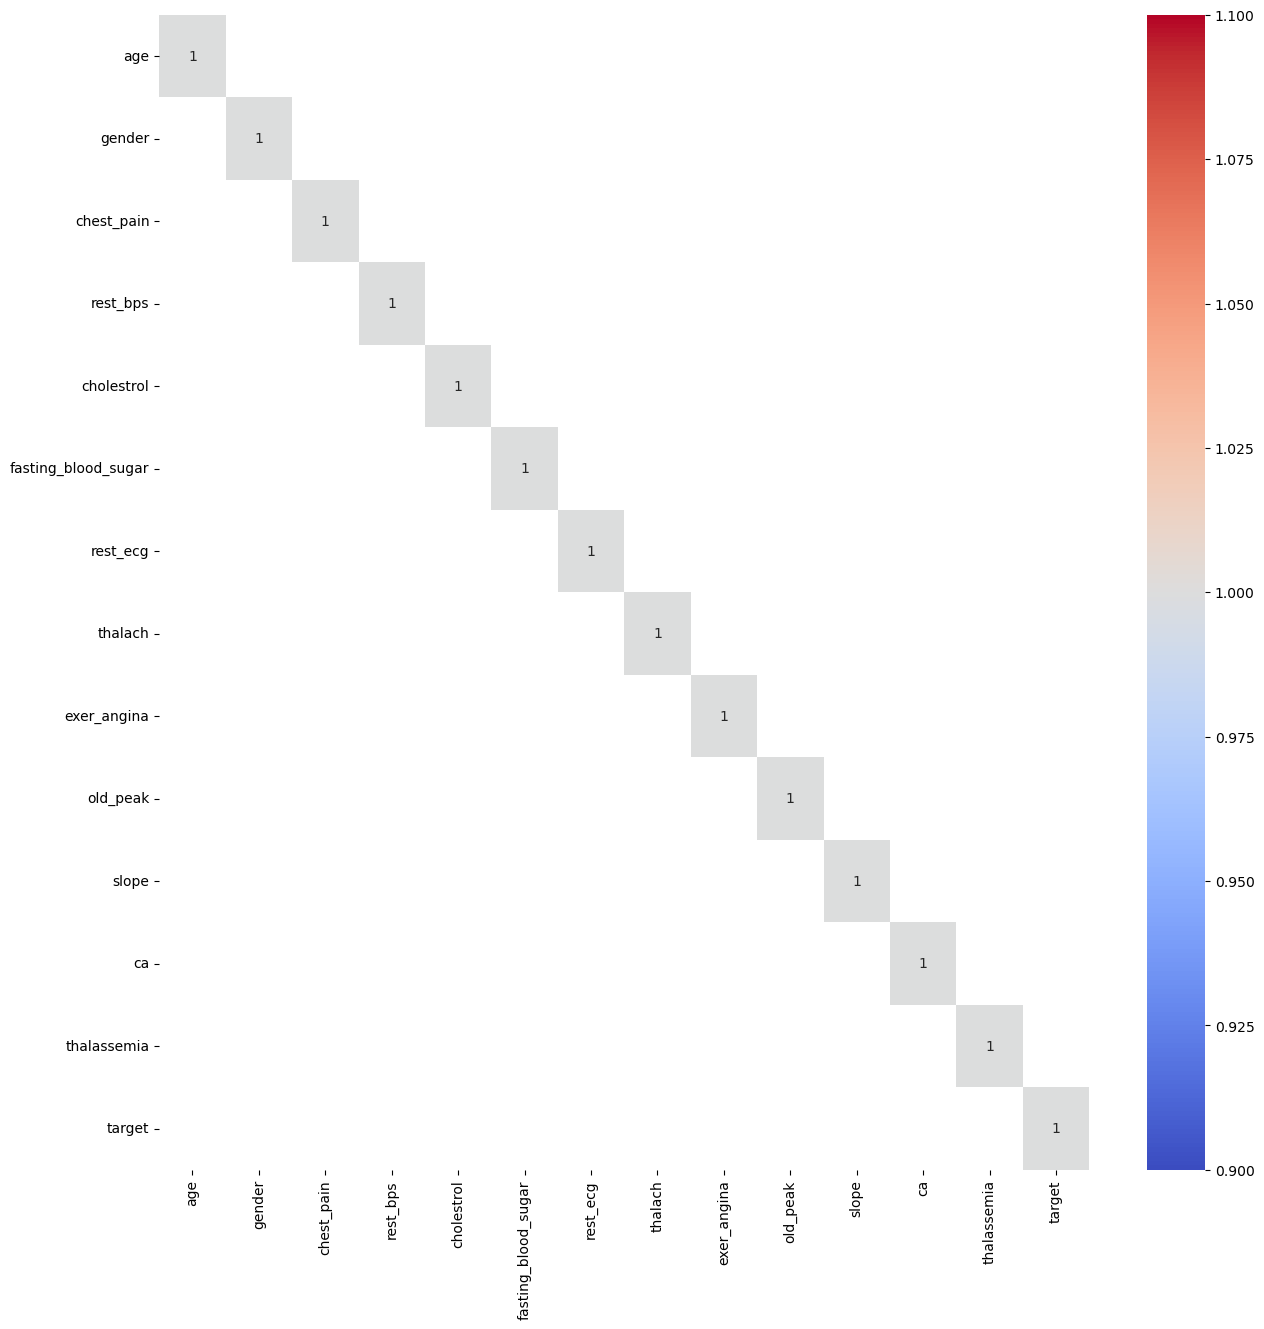

In [15]:
plt.figure(figsize=(15,15))
sns.heatmap(corr[abs(corr)>0.7], annot=True, cmap='coolwarm')
plt.show()

#### inference: 
there are no highly correlated features

### Outlier Treatment

In [16]:
df.columns

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')

In [17]:
cont_cols =['age', 'rest_bps', 'cholestrol', 'thalach', 'old_peak']

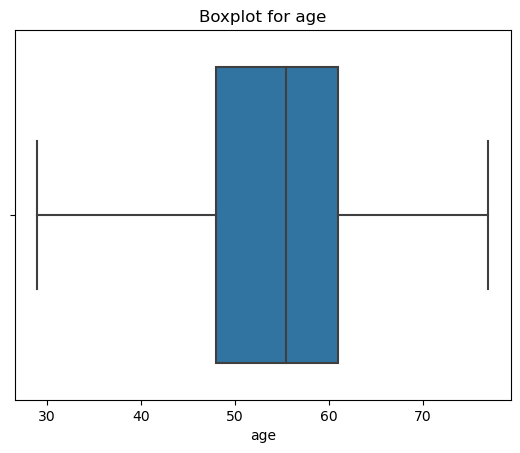

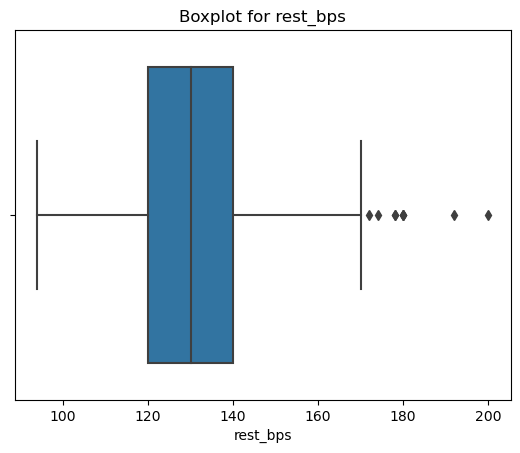

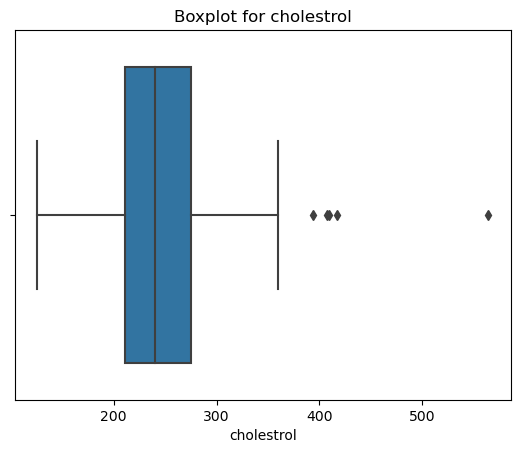

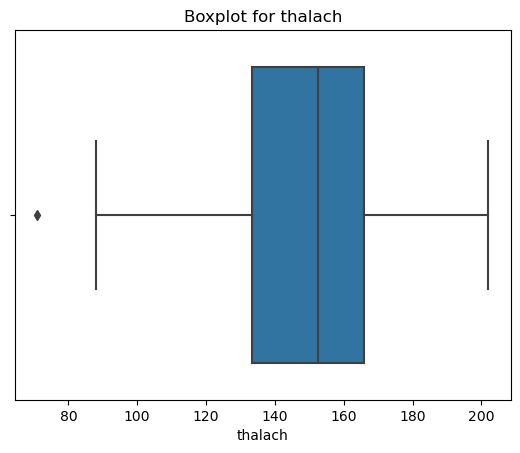

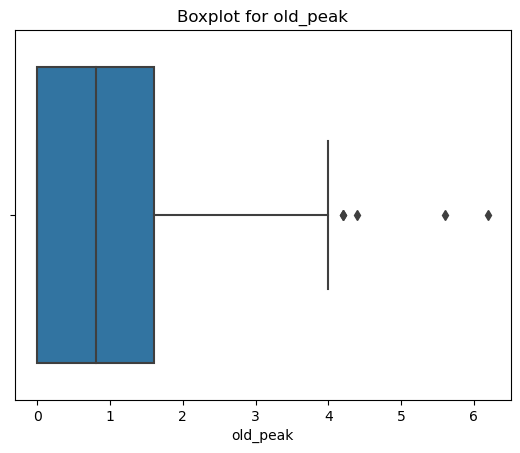

In [18]:
for i in cont_cols:
    sns.boxplot(x=df[i])
    plt.title(f'Boxplot for {i}')
    plt.show()

In [19]:
df[cont_cols].describe(percentiles=[0.01,0.02,0.03,0.05,0.95,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,5%,50%,95%,97%,98%,99%,max
age,302.0,54.420530,9.047970,29.0,35.00,35.04,38.00,40.00,55.5,68.00,69.97,70.00,71.00,77.0
rest_bps,302.0,131.602649,17.563394,94.0,100.00,101.02,104.03,108.00,130.0,160.00,170.00,177.92,180.00,200.0
cholestrol,302.0,246.500000,51.753489,126.0,149.00,160.08,167.03,175.05,240.5,326.95,340.97,353.98,406.87,564.0
thalach,302.0,149.569536,22.903527,71.0,95.01,97.04,103.06,108.05,152.5,181.95,184.97,186.98,191.98,202.0
old_peak,302.0,1.043046,1.161452,0.0,0.00,0.00,0.00,0.00,0.8,3.40,3.60,4.00,4.20,6.2


In [20]:
df[df['thalach']<95.01].shape

(4, 14)

In [21]:
df[df['old_peak']>4.0].shape

(5, 14)

In [22]:
df[df['rest_bps']>170].shape

(9, 14)

In [23]:
df[df['cholestrol']>353.98].shape

(7, 14)

In [24]:
def outlier_treatment(x):
    x = x.clip(upper=x.quantile(0.97))
    x = x.clip(lower=x.quantile(0.02))
    return x

In [25]:
outlier_cols = ['rest_bps', 'cholestrol', 'thalach', 'old_peak']

In [26]:
df[outlier_cols] = df[outlier_cols].apply(outlier_treatment)

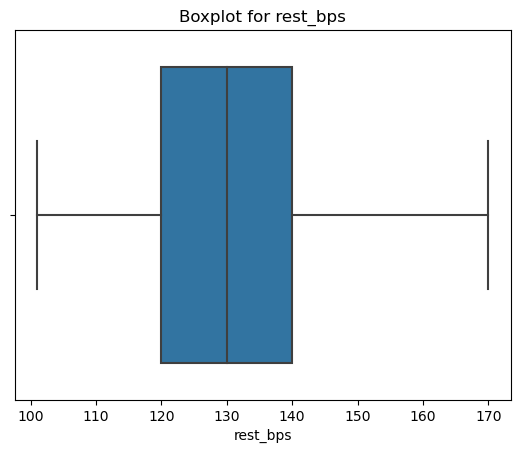

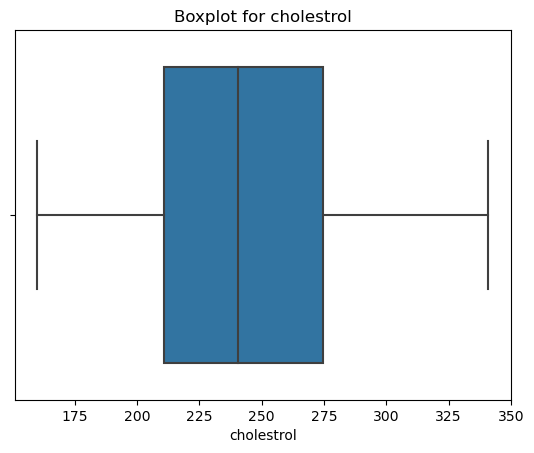

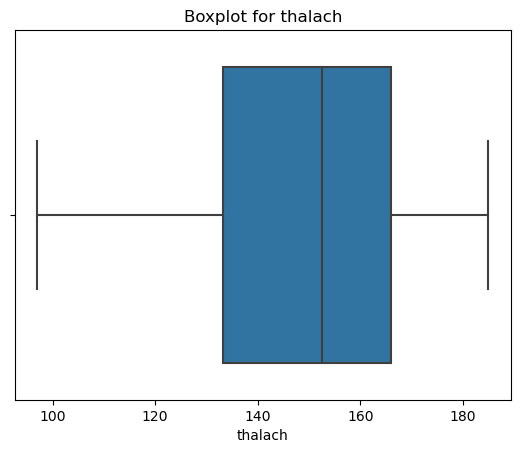

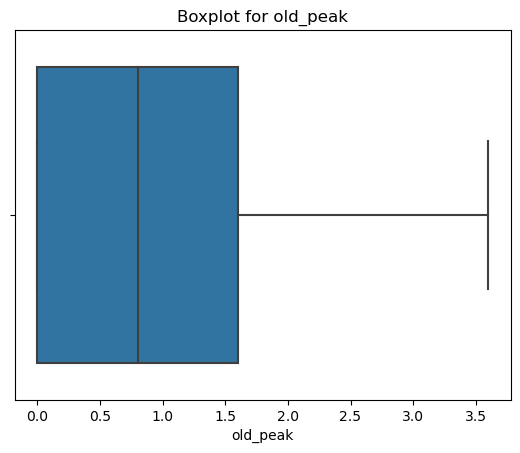

In [27]:
for i in outlier_cols:
    sns.boxplot(x=df[i])
    plt.title(f'Boxplot for {i}')
    plt.show()

### Selecting dependent and independent features

In [28]:
x = df.drop('target', axis=1)
y = df['target']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(302, 13)
(302,)


In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(211, 13)
(91, 13)
(211,)
(91,)


In [30]:
from sklearn.metrics import confusion_matrix, classification_report

In [31]:
def model_metrics(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    train_scr = model.score(x_train,y_train)
    test_scr = model.score(x_test,y_test)
    print('Training score',train_scr)
    print('Testing score',test_scr)
    ypred = model.predict(x_test)
    print('Predictions',ypred)
    cm = confusion_matrix(y_test,ypred)
    print(cm)
    print(classification_report(y_test,ypred))
    res = {'Train Score': train_scr, 'Test Score': test_scr}
    return res

### Model Building

#### Model 1 : Decision Tree Base Model

In [32]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

In [33]:
dt1 = DecisionTreeClassifier(random_state=20)
dt1_res = model_metrics(dt1,x_train,x_test,y_train,y_test)

Training score 1.0
Testing score 0.8241758241758241
Predictions [0 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 1
 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1
 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1]
[[35  7]
 [ 9 40]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        42
           1       0.85      0.82      0.83        49

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



#### inference:
The model is highly overfit

In [34]:
model1 = pd.DataFrame(dt1_res, index=['DT(Base Model)'])
model1

,Train Score,Test Score
DT(Base Model),1.0,0.824176


In [35]:
fn = x_train.columns
cn = ['0','1']

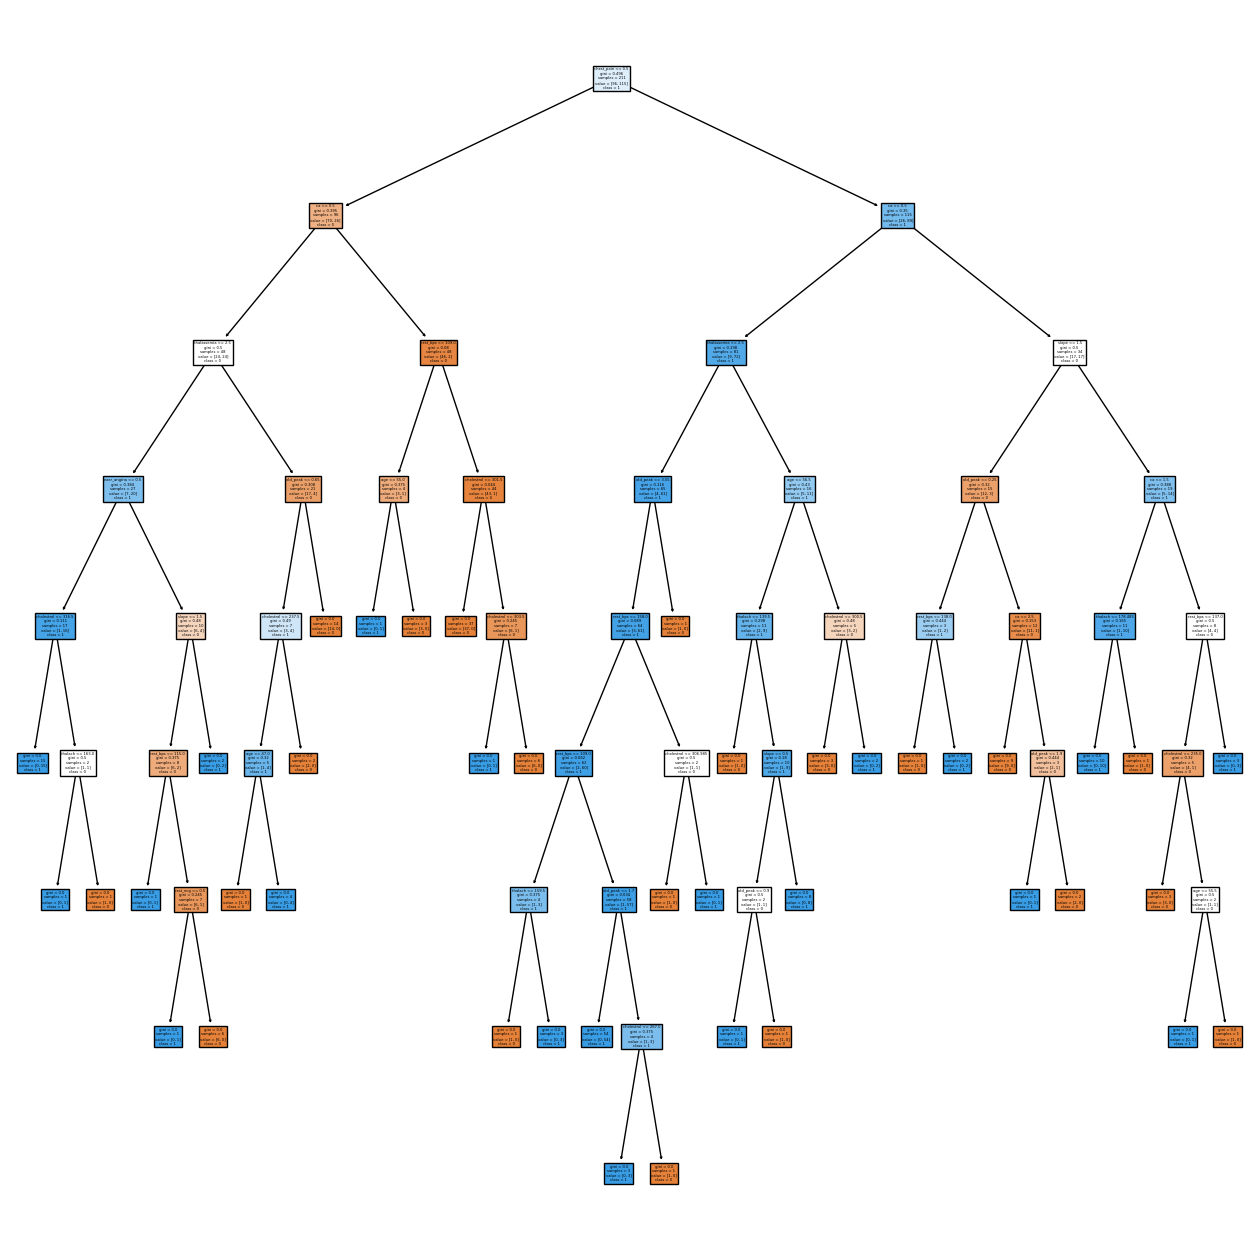

In [36]:
plt.figure(figsize=(16,16))
plot_tree(dt1,feature_names=fn, class_names=cn, filled=True)
plt.show()

#### Model 2 : Decision Tree with Gini Criterion and Pruning

In [37]:
dt2 = DecisionTreeClassifier(criterion='gini', max_depth=7, min_samples_split=20)
dt2_res = model_metrics(dt2,x_train,x_test,y_train,y_test)

Training score 0.8767772511848341
Testing score 0.8021978021978022
Predictions [0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1
 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1
 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0 1 1]
[[33  9]
 [ 9 40]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        42
           1       0.82      0.82      0.82        49

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



In [38]:
model2 = pd.DataFrame(dt2_res, index=['DT(Gini with Pruning)'])
model2

,Train Score,Test Score
DT(Gini with Pruning),0.876777,0.802198


In [39]:
fn = x_train.columns
cn = ['0','1']

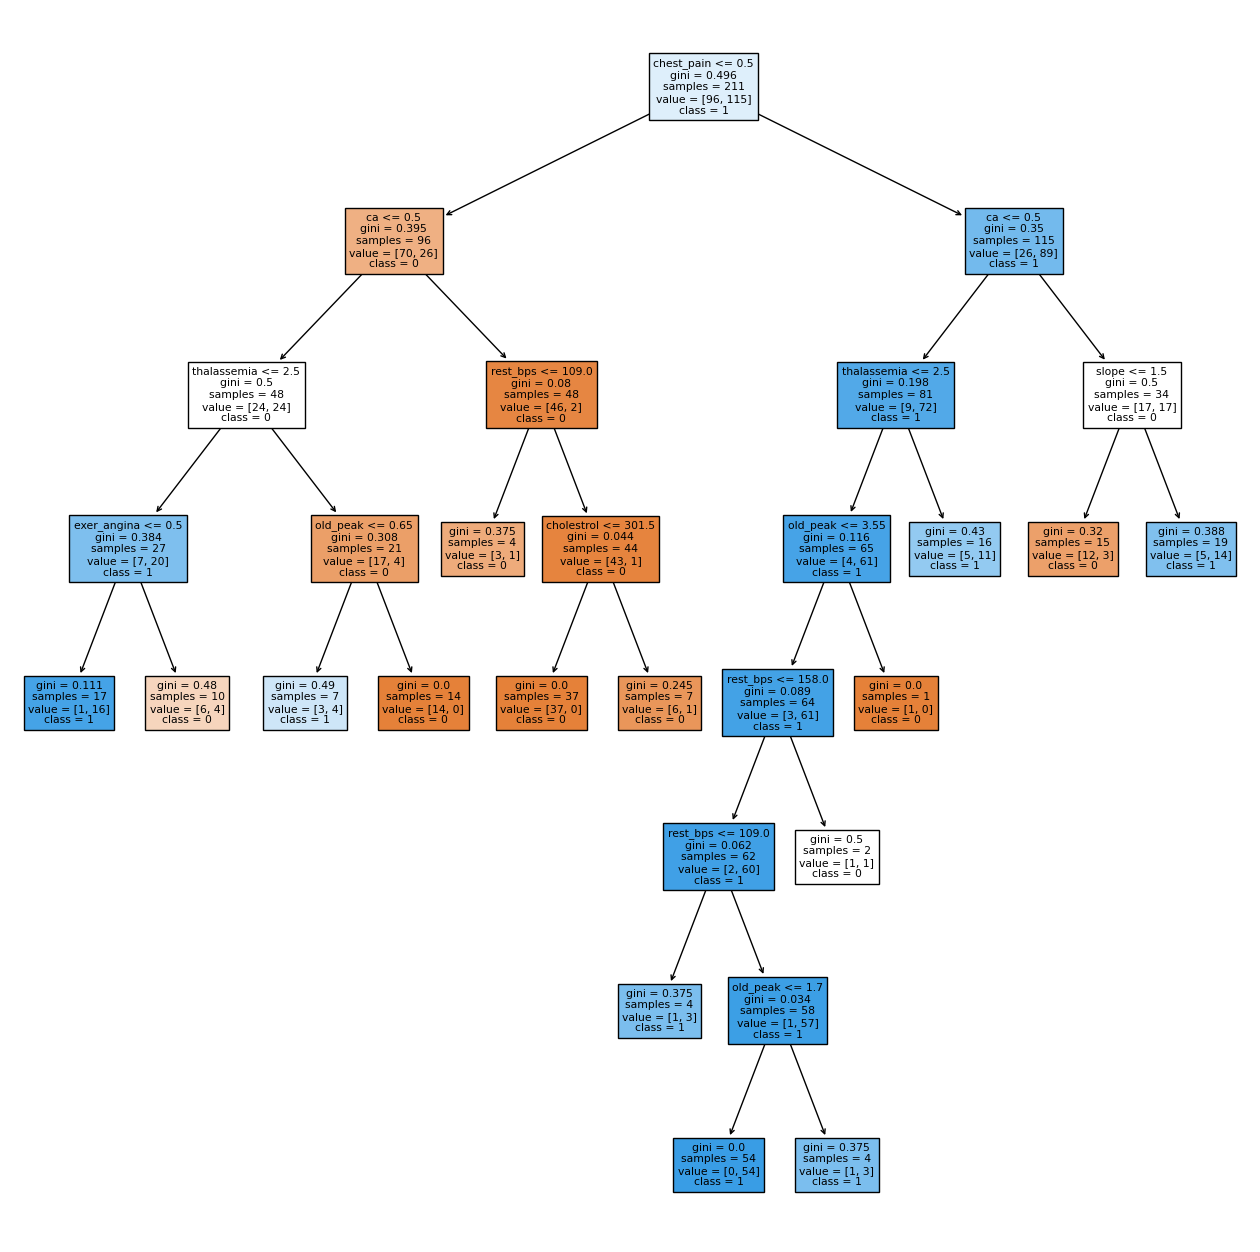

In [40]:
plt.figure(figsize=(16,16))
plot_tree(dt2,feature_names=fn, class_names=cn, filled=True)
plt.show()

#### Model 3 : Decision Tree with Entropy Criterion and Pruning

In [41]:
dt3 = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=25)
dt3_res = model_metrics(dt3,x_train,x_test,y_train,y_test)

Training score 0.8862559241706162
Testing score 0.8131868131868132
Predictions [0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1
 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1
 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1]
[[38  4]
 [13 36]]
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        42
           1       0.90      0.73      0.81        49

    accuracy                           0.81        91
   macro avg       0.82      0.82      0.81        91
weighted avg       0.83      0.81      0.81        91



In [42]:
model3 = pd.DataFrame(dt3_res, index=['DT(Entropy with Pruning)'])
model3

,Train Score,Test Score
DT(Entropy with Pruning),0.886256,0.813187


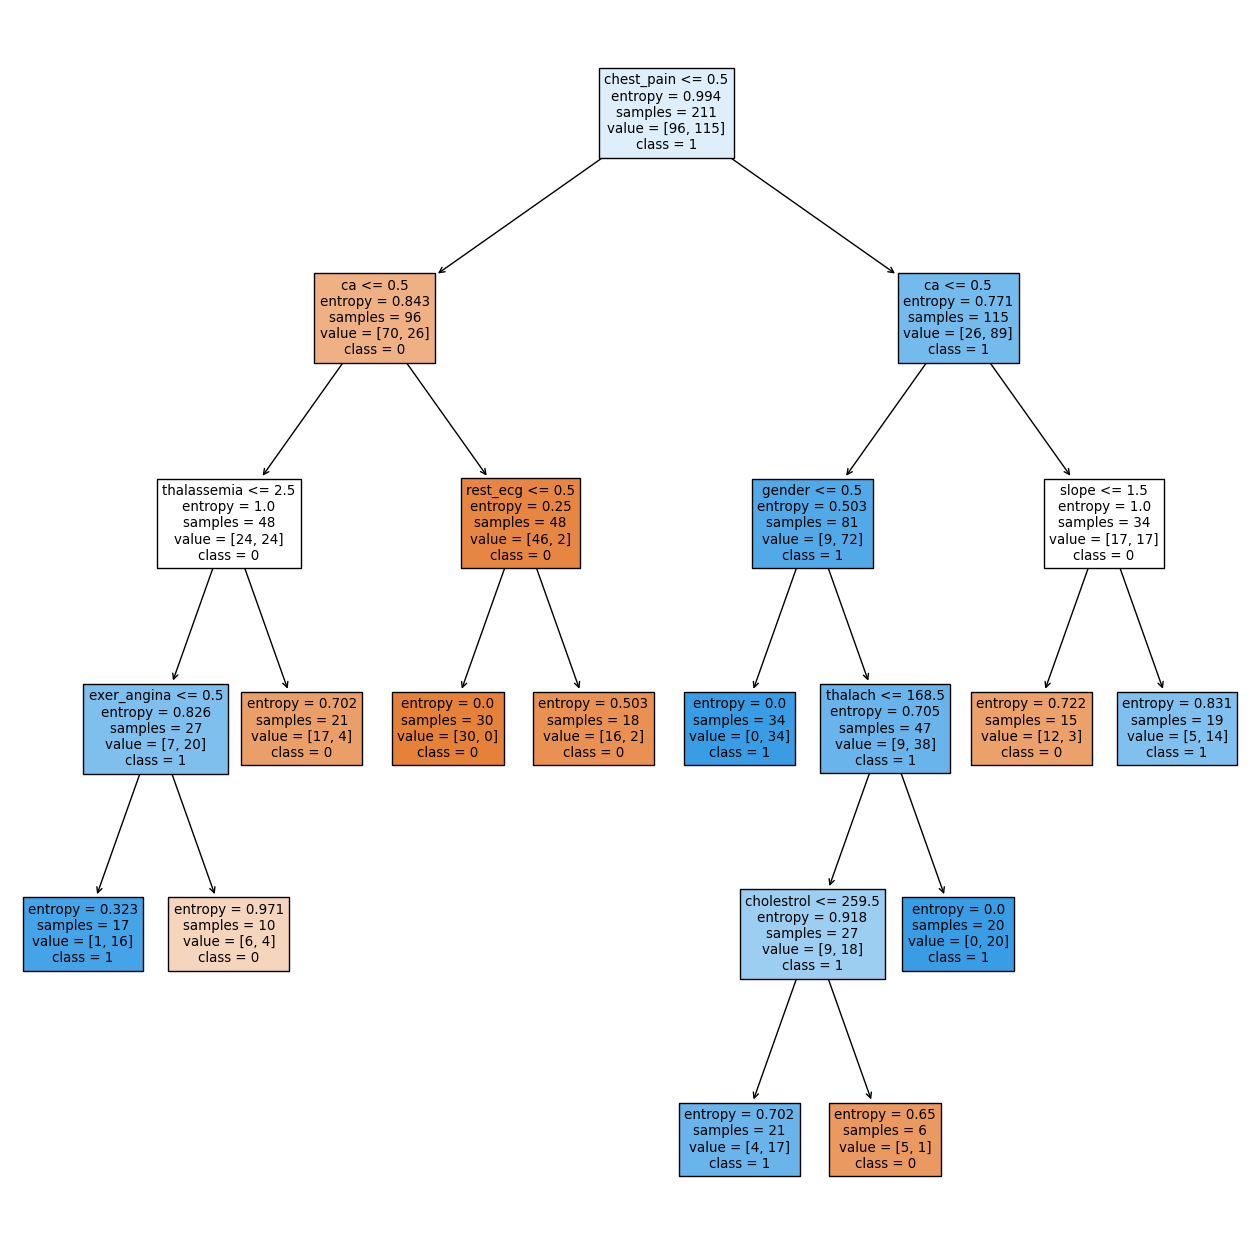

In [43]:
plt.figure(figsize=(16,16))
plot_tree(dt3,feature_names=fn, class_names=cn, filled=True)
plt.show()

#### Model 4 : Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
lr1 = LogisticRegression(max_iter = 1000)
lr1_res = model_metrics(lr1,x_train,x_test,y_train,y_test)

Training score 0.8767772511848341
Testing score 0.8351648351648352
Predictions [0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1
 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1
 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1]
[[34  8]
 [ 7 42]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        42
           1       0.84      0.86      0.85        49

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91



In [46]:
model4 = pd.DataFrame(lr1_res, index=['DT(Logistic Regression)'])
model4

,Train Score,Test Score
DT(Logistic Regression),0.876777,0.835165


#### combining all results

In [47]:
res = pd.concat([model1, model2, model3, model4])
res

,Train Score,Test Score
DT(Base Model),1.000000,0.824176
DT(Gini with Pruning),0.876777,0.802198
DT(Entropy with Pruning),0.886256,0.813187
DT(Logistic Regression),0.876777,0.835165


### Cross Validation

In [48]:
from sklearn.model_selection import cross_val_score, KFold

#### CV for max_depth

In [49]:
# md = max_depth
md = [4,5,6,7,8,9]
kf = KFold(n_splits=7)
for i in md:
    scores = cross_val_score(DecisionTreeClassifier(max_depth=i),x_train,y_train,cv=kf,scoring='accuracy')
    print(f'Scores at max_depth {i} is {scores}')
    print(f'Avg_Score at max_depth {i} is {scores.mean()}')
    print('*'*100)

Scores at max_depth 4 is [0.83870968 0.7        0.8        0.73333333 0.7        0.8
 0.73333333]
Avg_Score at max_depth 4 is 0.7579109062980031
****************************************************************************************************
Scores at max_depth 5 is [0.83870968 0.66666667 0.8        0.73333333 0.7        0.7
 0.76666667]
Avg_Score at max_depth 5 is 0.7436251920122888
****************************************************************************************************
Scores at max_depth 6 is [0.80645161 0.63333333 0.83333333 0.56666667 0.73333333 0.76666667
 0.66666667]
Avg_Score at max_depth 6 is 0.7152073732718894
****************************************************************************************************
Scores at max_depth 7 is [0.83870968 0.6        0.86666667 0.66666667 0.66666667 0.73333333
 0.63333333]
Avg_Score at max_depth 7 is 0.7150537634408602
****************************************************************************************************
Sc

#### CV for min_samples_split

In [50]:
# ms = min_samples_split
mss = [10,12,14,17,20,22]
kf = KFold(n_splits=7)
for i in mss:
    scores = cross_val_score(DecisionTreeClassifier(min_samples_split=i),x_train,y_train,cv=kf,scoring='accuracy')
    print(f'Scores at max_depth {i} is {scores}')
    print(f'Avg_Score at min_samples_split {i} is {scores.mean()}')
    print('*'*100)

Scores at max_depth 10 is [0.77419355 0.7        0.83333333 0.7        0.7        0.73333333
 0.73333333]
Avg_Score at min_samples_split 10 is 0.7391705069124425
****************************************************************************************************
Scores at max_depth 12 is [0.83870968 0.7        0.76666667 0.7        0.73333333 0.73333333
 0.73333333]
Avg_Score at min_samples_split 12 is 0.7436251920122887
****************************************************************************************************
Scores at max_depth 14 is [0.83870968 0.7        0.76666667 0.73333333 0.73333333 0.66666667
 0.73333333]
Avg_Score at min_samples_split 14 is 0.738863287250384
****************************************************************************************************
Scores at max_depth 17 is [0.83870968 0.7        0.76666667 0.73333333 0.66666667 0.66666667
 0.76666667]
Avg_Score at min_samples_split 17 is 0.7341013824884792
**************************************************

#### CV for max_depth and min_samples_splitm

In [51]:
md = [4,5,6,7,8,9]
mss = [10,12,14,17,20,22,25]
# criteerion = ['gini', 'entropy']
kf = KFold(n_splits=7)
for i in md:
    for j in mss:
        scores = cross_val_score(DecisionTreeClassifier(max_depth=i, min_samples_split=j),x_train,y_train,cv=kf,scoring='accuracy')
        print(f'Avg_Score at max_depth {i} and min_samples_split {j} is {scores.mean()}')
        print('*'*100)

Avg_Score at max_depth 4 and min_samples_split 10 is 0.7579109062980031
****************************************************************************************************
Avg_Score at max_depth 4 and min_samples_split 12 is 0.7579109062980031
****************************************************************************************************
Avg_Score at max_depth 4 and min_samples_split 14 is 0.7579109062980031
****************************************************************************************************
Avg_Score at max_depth 4 and min_samples_split 17 is 0.7579109062980031
****************************************************************************************************
Avg_Score at max_depth 4 and min_samples_split 20 is 0.7625192012288787
****************************************************************************************************
Avg_Score at max_depth 4 and min_samples_split 22 is 0.776804915514593
****************************************************************

### HyperParameter Tuning using GridSearchCV

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
hparams_dt = {'criterion':['gini', 'entropy'],
             'max_depth': list(range(4,12)),
             'min_samples_split':[8,10,12,14,15,17,20,22,24]}

In [54]:
bmodel = DecisionTreeClassifier()
kf = KFold(n_splits=5)
gs1 = GridSearchCV(estimator=bmodel, param_grid = hparams_dt, cv=kf, scoring='accuracy')
gs1.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11],
                         'min_samples_split': [8, 10, 12, 14, 15, 17, 20, 22,
                                               24]},
             scoring='accuracy')

In [55]:
print('Best Hyperparameters')
print(gs1.best_params_)
print(gs1.best_estimator_)

Best Hyperparameters
{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 8}
DecisionTreeClassifier(max_depth=4, min_samples_split=8)


In [56]:
# explanatory only
gs_res = pd.DataFrame(gs1.cv_results_)
print(gs_res.shape)
gs_res.head()

(144, 16)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001243,0.000312,0.000675,0.000069,gini,4,8,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.790698,0.761905,0.761905,0.809524,0.785714,0.781949,0.018191,1
1,0.001019,0.000075,0.000615,0.000067,gini,4,10,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.790698,0.738095,0.738095,0.809524,0.785714,0.772425,0.029134,8
2,0.000944,0.000009,0.000613,0.000054,gini,4,12,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.790698,0.761905,0.738095,0.809524,0.785714,0.777187,0.024749,2
3,0.000969,0.000021,0.000609,0.000039,gini,4,14,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.790698,0.761905,0.738095,0.809524,0.761905,0.772425,0.024940,8
4,0.000947,0.000011,0.000572,0.000007,gini,4,15,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.790698,0.761905,0.738095,0.809524,0.761905,0.772425,0.024940,8


In [57]:
gs_res.shape

(144, 16)

In [58]:
gs_res.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_criterion', 'param_max_depth', 'param_min_samples_split',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [59]:
r1 = gs_res[['param_criterion', 'param_max_depth', 'param_min_samples_split','mean_test_score']]
r1.head()

,param_criterion,param_max_depth,param_min_samples_split,mean_test_score
0,gini,4,8,0.781949
1,gini,4,10,0.772425
2,gini,4,12,0.777187
3,gini,4,14,0.772425
4,gini,4,15,0.772425


In [60]:
r1[r1['mean_test_score']==r1['mean_test_score'].max()]

,param_criterion,param_max_depth,param_min_samples_split,mean_test_score
0,gini,4,8,0.781949


In [61]:
print('Train Score:', gs1.score(x_train, y_train))
print('Test Score:', gs1.score(x_test, y_test))

Train Score: 0.8862559241706162
Test Score: 0.7582417582417582


In [62]:
gs_based_model = DecisionTreeClassifier(**gs1.best_params_)
gs_based_res = model_metrics(gs_based_model,x_train,x_test,y_train,y_test)

Training score 0.8862559241706162
Testing score 0.7362637362637363
Predictions [0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1
 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1
 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1]
[[34  8]
 [16 33]]
              precision    recall  f1-score   support

           0       0.68      0.81      0.74        42
           1       0.80      0.67      0.73        49

    accuracy                           0.74        91
   macro avg       0.74      0.74      0.74        91
weighted avg       0.75      0.74      0.74        91



In [63]:
gs_model = pd.DataFrame(gs_based_res, index=['DT(GridSearchCv)'])
gs_model

,Train Score,Test Score
DT(GridSearchCv),0.886256,0.736264


In [64]:
res = pd.concat([res,gs_model])
res

,Train Score,Test Score
DT(Base Model),1.000000,0.824176
DT(Gini with Pruning),0.876777,0.802198
DT(Entropy with Pruning),0.886256,0.813187
DT(Logistic Regression),0.876777,0.835165
DT(GridSearchCv),0.886256,0.736264


#### inference:
test score is not increasing bcz the last is more robust

### RandomizedSearchCV

In [66]:
from sklearn.model_selection import RandomizedSearchCV

In [67]:
print(hparams_dt)

{'criterion': ['gini', 'entropy'], 'max_depth': [4, 5, 6, 7, 8, 9, 10, 11], 'min_samples_split': [8, 10, 12, 14, 15, 17, 20, 22, 24]}


In [68]:
bmodel = DecisionTreeClassifier()
kf = KFold(n_splits=5)
rs1 = RandomizedSearchCV(estimator=bmodel, param_distributions = hparams_dt, cv=kf, scoring='accuracy')
rs1.fit(x_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 5, 6, 7, 8, 9, 10, 11],
                                        'min_samples_split': [8, 10, 12, 14, 15,
                                                              17, 20, 22, 24]},
                   scoring='accuracy')

In [69]:
rs_res = pd.DataFrame(rs1.cv_results_)
print(rs_res.shape)

(10, 16)


In [70]:
# better for time complexity but might not give accurate results

In [71]:
print('Train Score:', rs1.score(x_train, y_train))
print('Test Score:', rs1.score(x_test, y_test))

Train Score: 0.8767772511848341
Test Score: 0.7582417582417582


In [72]:
print('Best Hyperparameters')
print(rs1.best_params_)
print(rs1.best_estimator_)

Best Hyperparameters
{'min_samples_split': 17, 'max_depth': 10, 'criterion': 'gini'}
DecisionTreeClassifier(max_depth=10, min_samples_split=17)


In [73]:
rs_based_model = DecisionTreeClassifier(**rs1.best_params_)
rs_based_res = model_metrics(rs_based_model,x_train,x_test,y_train,y_test)

Training score 0.8767772511848341
Testing score 0.7582417582417582
Predictions [0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1
 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1
 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1]
[[33  9]
 [13 36]]
              precision    recall  f1-score   support

           0       0.72      0.79      0.75        42
           1       0.80      0.73      0.77        49

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.76      0.76      0.76        91



In [74]:
rs_model = pd.DataFrame(rs_based_res, index=['DT(RandomizedSearchCV)'])
rs_model

,Train Score,Test Score
DT(RandomizedSearchCV),0.876777,0.758242


### Final Results

In [75]:
res = pd.concat([res,rs_model])
res

,Train Score,Test Score
DT(Base Model),1.000000,0.824176
DT(Gini with Pruning),0.876777,0.802198
DT(Entropy with Pruning),0.886256,0.813187
DT(Logistic Regression),0.876777,0.835165
DT(GridSearchCv),0.886256,0.736264
DT(RandomizedSearchCV),0.876777,0.758242
